In [2]:
import pandas as pd
import numpy as np

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_pickle('./Data/Rawdata/data.pkl')
df.head()

,borough,bin_#,house_#,street_name,job_#,job_doc._#,job_type,self_cert,block,lot,community_board,zip_code,bldg_type,residential,special_district_1,special_district_2,work_type,permit_status,filing_status,permit_type,permit_sequence_#,permit_subtype,oil_gas,site_fill,filing_date,issuance_date,expiration_date,job_start_date,permittee's_first_name,permittee's_last_name,permittee's_business_name,permittee's_phone_#,permittee's_license_type,permittee's_license_#,act_as_superintendent,permittee's_other_title,hic_license,site_safety_mgr's_first_name,site_safety_mgr's_last_name,site_safety_mgr_business_name,superintendent_first_&_last_name,superintendent_business_name,owner's_business_type,non-profit,owner's_business_name,owner's_first_name,owner's_last_name,owner's_house_#,owner's_house_street_name,owner’s_house_city,owner’s_house_state,owner’s_house_zip_code,owner's_phone_#,dobrundate,permit_si_no,latitude,longitude,council_district,census_tract,nta_name
0,MANHATTAN,1088749,1,MADISON AVE,141008987,1,A3,Y,00853,00002,105,10010.0,2.0,True,<NA>,<NA>,EQ,ISSUED,INITIAL,EQ,1,OT,NaN,NaN,2022-05-10,2022-05-10,2023-05-10,2022-05-10,FRANKIE,COLLETTA,"FORCE INSTALLATIONS, LLC",2122441050,GC,0621634,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,CORPORATION,N,SL GREEN REALTY CORP.,JOHN,KRUSH,<NA>,<NA>,<NA>,NaN,<NA>,2125942700,2022-05-11,3905851,40.740909,-73.987947,2.0,56.0,Hudson Yards-Chelsea-Flatiron-Union Square
1,STATEN ISLAND,5076937,87,BOYLAN STREET,540218539,1,A2,Y,05687,00066,503,10312.0,1.0,True,SRD,<NA>,OT,ISSUED,INITIAL,EW,1,OT,NaN,NOT APPLICABLE,2022-05-10,2022-05-10,2022-10-01,2022-05-12,PAUL,JOYCE,SUNRUN INSTALLATION SVC,8055407643,GC,0613329,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,INDIVIDUAL,N,<NA>,STEVEN,MONTANA,<NA>,<NA>,<NA>,NaN,<NA>,9174201655,2022-05-11,3905852,40.563654,-74.179584,51.0,17008.0,Arden Heights
2,STATEN ISLAND,5001506,217,LAFAYETTE AVENUE,540218575,1,A2,Y,00064,00022,501,10301.0,1.0,True,HS,<NA>,OT,ISSUED,INITIAL,EW,1,OT,NaN,NOT APPLICABLE,2022-05-10,2022-05-10,2022-10-01,2022-05-15,PAUL,JOYCE,SUNRUN INSTALLATION SVC,8055407643,GC,0613329,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,INDIVIDUAL,N,<NA>,SANTO,CEBALLOS,<NA>,<NA>,<NA>,NaN,<NA>,7188125847,2022-05-11,3905853,40.639633,-74.094169,49.0,81.0,West New Brighton-New Brighton-St. George
3,STATEN ISLAND,5067021,170,OAKDALE STREET,540218600,1,A2,Y,05260,00001,503,10308.0,1.0,True,SRD,<NA>,OT,ISSUED,INITIAL,EW,1,OT,NaN,NOT APPLICABLE,2022-05-10,2022-05-10,2022-10-01,2022-05-15,PAUL,JOYCE,SUNRUN INSTALLATION SVC,8055407643,GC,0613329,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,INDIVIDUAL,N,<NA>,JOANNA,GIANGRANDE,<NA>,<NA>,<NA>,NaN,<NA>,3478575846,2022-05-11,3905854,40.544597,-74.157153,51.0,15601.0,Great Kills
4,STATEN ISLAND,5058036,273,10 STREET,540218628,1,A2,Y,04242,00045,502,10306.0,1.0,True,<NA>,<NA>,OT,ISSUED,INITIAL,EW,1,OT,NaN,NOT APPLICABLE,2022-05-10,2022-05-10,2022-11-15,2022-05-24,ALEXANDER,YACKERY,VENTURE HOME SOLAR LLC,7183982259,GC,0615255,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,INDIVIDUAL,N,<NA>,ARKADLY,FRIDMAN,<NA>,<NA>,<NA>,NaN,<NA>,7186195891,2022-05-11,3905855,40.566798,-74.119726,50.0,134.0,New Dorp-Midland Beach


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3952399 entries, 0 to 3952398
Data columns (total 60 columns):
 #   Column                            Dtype         
---  ------                            -----         
 0   borough                           category      
 1   bin_#                             string        
 2   house_#                           string        
 3   street_name                       string        
 4   job_#                             string        
 5   job_doc._#                        category      
 6   job_type                          category      
 7   self_cert                         category      
 8   block                             string        
 9   lot                               string        
 10  community_board                   string        
 11  zip_code                          string        
 12  bldg_type                         category      
 13  residential                       bool          
 14  special_district_1

In [6]:
target = ['permit_type']

In [7]:
my_features = list(df.columns[31:45])
my_features

["permittee's_phone_#",
 "permittee's_license_type",
 "permittee's_license_#",
 'act_as_superintendent',
 "permittee's_other_title",
 'hic_license',
 "site_safety_mgr's_first_name",
 "site_safety_mgr's_last_name",
 'site_safety_mgr_business_name',
 'superintendent_first_&_last_name',
 'superintendent_business_name',
 "owner's_business_type",
 'non-profit',
 "owner's_business_name"]

# "permittee's_phone_#", "permittee's_license_#", "site_safety_mgr's_first_name", "site_safety_mgr's_last_name", 'site_safety_mgr_business_name', 'superintendent_first_&_last_name', 'superintendent_business_name', "owner's_business_name", will not affect the "permit_type" 

# permittee's_license_type

In [8]:
df["permittee's_license_type"].unique()

['GC', 'MP', 'FS', NaN, 'OB', ..., 'T@', 'DM', 'HI', 'N', '5S']
Length: 15
Categories (14, object): ['5S', 'DM', 'FS', 'GC', ..., 'PE', 'RA', 'SI', 'T@']

In [9]:
df['job_type'].unique()

['A3', 'A2', 'NB', 'A1', 'DM', 'SG']
Categories (6, object): ['A1', 'A2', 'A3', 'DM', 'NB', 'SG']

In [10]:
df['work_type'].unique()

['EQ', 'OT', 'PL', NaN, 'BL', ..., 'FS', 'FP', 'CC', 'FA', 'NB']
Length: 14
Categories (13, object): ['BL', 'CC', 'EQ', 'FA', ..., 'OT', 'PL', 'SD', 'SP']

In [11]:
df[['job_type', 'work_type']].value_counts()

job_type  work_type
A2        OT           1064813
          PL            522091
          MH            347180
A3        EQ            291950
A2        SP            139018
NB        PL            128070
          EQ            125556
A1        PL            125477
A3        OT             98057
A2        BL             74994
          EQ             68840
          FP             64987
A1        EQ             47096
DM        EQ             42605
A2        FB             41269
          FS             24300
          SD             22590
A3        CC             11756
A2        FA               257
A1        SP               213
NB        SP               110
          SD                48
A1        FP                28
SG        EQ                20
A1        SD                17
NB        FP                 9
A1        FA                 7
NB        FA                 2
          NB                 1
dtype: int64

In [15]:
df['permit_status'].value_counts()

ISSUED        3872138
RE-ISSUED       48683
IN PROCESS      20370
REVOKED             5
Name: permit_status, dtype: int64

In [16]:
df['permit_appl_time'] = df['issuance_date'] - df['filing_date']

In [13]:
df['permit_duration'] = df['expiration_date'] - df['issuance_date']

<AxesSubplot:>

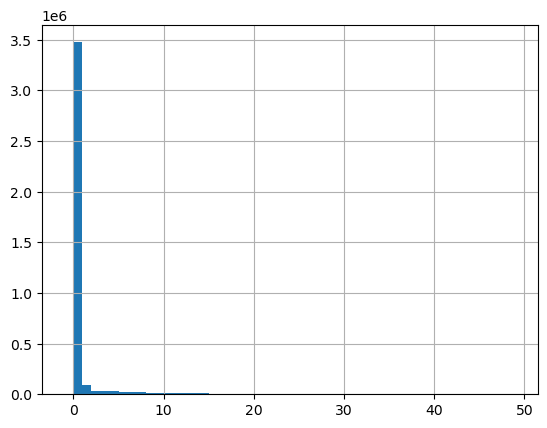

In [17]:
bin_range = np.arange(-1, 50, 1)
df['permit_appl_time'].dt.days.hist(bins=bin_range)

<AxesSubplot:>

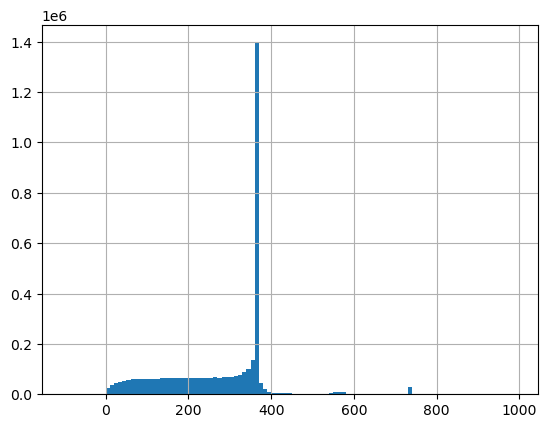

In [18]:
bin_range = np.arange(-100, 1000, 10)
df['permit_duration'].dt.days.hist(bins=bin_range)

In [19]:
df

,borough,bin_#,house_#,street_name,job_#,job_doc._#,job_type,self_cert,block,lot,community_board,zip_code,bldg_type,residential,special_district_1,special_district_2,work_type,permit_status,filing_status,permit_type,permit_sequence_#,permit_subtype,oil_gas,site_fill,filing_date,issuance_date,expiration_date,job_start_date,permittee's_first_name,permittee's_last_name,permittee's_business_name,permittee's_phone_#,permittee's_license_type,permittee's_license_#,act_as_superintendent,permittee's_other_title,hic_license,site_safety_mgr's_first_name,site_safety_mgr's_last_name,site_safety_mgr_business_name,superintendent_first_&_last_name,superintendent_business_name,owner's_business_type,non-profit,owner's_business_name,owner's_first_name,owner's_last_name,owner's_house_#,owner's_house_street_name,owner’s_house_city,owner’s_house_state,owner’s_house_zip_code,owner's_phone_#,dobrundate,permit_si_no,latitude,longitude,council_district,census_tract,nta_name,permit_duration,permit_appl_time
0,MANHATTAN,1088749,1,MADISON AVE,141008987,1,A3,Y,00853,00002,105,10010.0,2.0,True,<NA>,<NA>,EQ,ISSUED,INITIAL,EQ,1,OT,NaN,NaN,2022-05-10,2022-05-10,2023-05-10,2022-05-10,FRANKIE,COLLETTA,"FORCE INSTALLATIONS, LLC",2122441050,GC,0621634,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,CORPORATION,N,SL GREEN REALTY CORP.,JOHN,KRUSH,<NA>,<NA>,<NA>,NaN,<NA>,2125942700,2022-05-11,3905851,40.740909,-73.987947,2.0,56.0,Hudson Yards-Chelsea-Flatiron-Union Square,365 days,0 days
1,STATEN ISLAND,5076937,87,BOYLAN STREET,540218539,1,A2,Y,05687,00066,503,10312.0,1.0,True,SRD,<NA>,OT,ISSUED,INITIAL,EW,1,OT,NaN,NOT APPLICABLE,2022-05-10,2022-05-10,2022-10-01,2022-05-12,PAUL,JOYCE,SUNRUN INSTALLATION SVC,8055407643,GC,0613329,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,INDIVIDUAL,N,<NA>,STEVEN,MONTANA,<NA>,<NA>,<NA>,NaN,<NA>,9174201655,2022-05-11,3905852,40.563654,-74.179584,51.0,17008.0,Arden Heights,144 days,0 days
2,STATEN ISLAND,5001506,217,LAFAYETTE AVENUE,540218575,1,A2,Y,00064,00022,501,10301.0,1.0,True,HS,<NA>,OT,ISSUED,INITIAL,EW,1,OT,NaN,NOT APPLICABLE,2022-05-10,2022-05-10,2022-10-01,2022-05-15,PAUL,JOYCE,SUNRUN INSTALLATION SVC,8055407643,GC,0613329,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,INDIVIDUAL,N,<NA>,SANTO,CEBALLOS,<NA>,<NA>,<NA>,NaN,<NA>,7188125847,2022-05-11,3905853,40.639633,-74.094169,49.0,81.0,West New Brighton-New Brighton-St. George,144 days,0 days
3,STATEN ISLAND,5067021,170,OAKDALE STREET,540218600,1,A2,Y,05260,00001,503,10308.0,1.0,True,SRD,<NA>,OT,ISSUED,INITIAL,EW,1,OT,NaN,NOT APPLICABLE,2022-05-10,2022-05-10,2022-10-01,2022-05-15,PAUL,JOYCE,SUNRUN INSTALLATION SVC,8055407643,GC,0613329,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,INDIVIDUAL,N,<NA>,JOANNA,GIANGRANDE,<NA>,<NA>,<NA>,NaN,<NA>,3478575846,2022-05-11,3905854,40.544597,-74.157153,51.0,15601.0,Great Kills,144 days,0 days
4,STATEN ISLAND,5058036,273,10 STREET,540218628,1,A2,Y,04242,00045,502,10306.0,1.0,True,<NA>,<NA>,OT,ISSUED,INITIAL,EW,1,OT,NaN,NOT APPLICABLE,2022-05-10,2022-05-10,2022-11-15,2022-05-24,ALEXANDER,YACKERY,VENTURE HOME SOLAR LLC,7183982259,GC,0615255,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,INDIVIDUAL,N,<NA>,ARKADLY,FRIDMAN,<NA>,<NA>,<NA>,NaN,<NA>,7186195891,2022-05-11,3905855,40.566798,-74.119726,50.0,134.0,New Dorp-Midland Beach,189 days,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3952394,QUEENS,4605192,39-15,QUEENS BOULEVARD,400759595,1,A2,NaN,00191,00047,402,11104.0,2.0,True,<NA>,<NA>,FP,ISSUED,INITIAL,EW,1,FP,NaN,NONE,1997-08-26,1997-08-26,1998-06-12,1997-08-26,PETER,MARTINEZ,"MASTER FIRE PREVENTION SYSTEMS,I",7188286424,FS,0000371,Y,<NA>,<NA>,<NA>,<NA>,<NA>,PETER MARTINEZ,"MASTER FIRE PREVENTION SYSTEMS,I",CORPORATION,N,GREEN HILL DEVEOPMENT CO.,EDUARO,CHUA,<NA>,<NA>,<NA>,NaN,<NA>,9086477457,2023-09-19,940516,40.743966,-73.925532,26.0,179.0,Hunters Point-Sunnyside-W

In [20]:
df_alt = df.loc[df.job_type.str.startswith('A'), :]
df_alt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3210542 entries, 0 to 3952398
Data columns (total 62 columns):
 #   Column                            Dtype          
---  ------                            -----          
 0   borough                           category       
 1   bin_#                             string         
 2   house_#                           string         
 3   street_name                       string         
 4   job_#                             string         
 5   job_doc._#                        category       
 6   job_type                          category       
 7   self_cert                         category       
 8   block                             string         
 9   lot                               string         
 10  community_board                   string         
 11  zip_code                          string         
 12  bldg_type                         category       
 13  residential                       bool           
 14  sp

In [21]:
df_alt.head()

,borough,bin_#,house_#,street_name,job_#,job_doc._#,job_type,self_cert,block,lot,community_board,zip_code,bldg_type,residential,special_district_1,special_district_2,work_type,permit_status,filing_status,permit_type,permit_sequence_#,permit_subtype,oil_gas,site_fill,filing_date,issuance_date,expiration_date,job_start_date,permittee's_first_name,permittee's_last_name,permittee's_business_name,permittee's_phone_#,permittee's_license_type,permittee's_license_#,act_as_superintendent,permittee's_other_title,hic_license,site_safety_mgr's_first_name,site_safety_mgr's_last_name,site_safety_mgr_business_name,superintendent_first_&_last_name,superintendent_business_name,owner's_business_type,non-profit,owner's_business_name,owner's_first_name,owner's_last_name,owner's_house_#,owner's_house_street_name,owner’s_house_city,owner’s_house_state,owner’s_house_zip_code,owner's_phone_#,dobrundate,permit_si_no,latitude,longitude,council_district,census_tract,nta_name,permit_duration,permit_appl_time
0,MANHATTAN,1088749,1,MADISON AVE,141008987,1,A3,Y,00853,00002,105,10010.0,2.0,True,<NA>,<NA>,EQ,ISSUED,INITIAL,EQ,1,OT,NaN,NaN,2022-05-10,2022-05-10,2023-05-10,2022-05-10,FRANKIE,COLLETTA,"FORCE INSTALLATIONS, LLC",2122441050,GC,0621634,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,CORPORATION,N,SL GREEN REALTY CORP.,JOHN,KRUSH,<NA>,<NA>,<NA>,NaN,<NA>,2125942700,2022-05-11,3905851,40.740909,-73.987947,2.0,56.0,Hudson Yards-Chelsea-Flatiron-Union Square,365 days,0 days
1,STATEN ISLAND,5076937,87,BOYLAN STREET,540218539,1,A2,Y,05687,00066,503,10312.0,1.0,True,SRD,<NA>,OT,ISSUED,INITIAL,EW,1,OT,NaN,NOT APPLICABLE,2022-05-10,2022-05-10,2022-10-01,2022-05-12,PAUL,JOYCE,SUNRUN INSTALLATION SVC,8055407643,GC,0613329,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,INDIVIDUAL,N,<NA>,STEVEN,MONTANA,<NA>,<NA>,<NA>,NaN,<NA>,9174201655,2022-05-11,3905852,40.563654,-74.179584,51.0,17008.0,Arden Heights,144 days,0 days
2,STATEN ISLAND,5001506,217,LAFAYETTE AVENUE,540218575,1,A2,Y,00064,00022,501,10301.0,1.0,True,HS,<NA>,OT,ISSUED,INITIAL,EW,1,OT,NaN,NOT APPLICABLE,2022-05-10,2022-05-10,2022-10-01,2022-05-15,PAUL,JOYCE,SUNRUN INSTALLATION SVC,8055407643,GC,0613329,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,INDIVIDUAL,N,<NA>,SANTO,CEBALLOS,<NA>,<NA>,<NA>,NaN,<NA>,7188125847,2022-05-11,3905853,40.639633,-74.094169,49.0,81.0,West New Brighton-New Brighton-St. George,144 days,0 days
3,STATEN ISLAND,5067021,170,OAKDALE STREET,540218600,1,A2,Y,05260,00001,503,10308.0,1.0,True,SRD,<NA>,OT,ISSUED,INITIAL,EW,1,OT,NaN,NOT APPLICABLE,2022-05-10,2022-05-10,2022-10-01,2022-05-15,PAUL,JOYCE,SUNRUN INSTALLATION SVC,8055407643,GC,0613329,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,INDIVIDUAL,N,<NA>,JOANNA,GIANGRANDE,<NA>,<NA>,<NA>,NaN,<NA>,3478575846,2022-05-11,3905854,40.544597,-74.157153,51.0,15601.0,Great Kills,144 days,0 days
4,STATEN ISLAND,5058036,273,10 STREET,540218628,1,A2,Y,04242,00045,502,10306.0,1.0,True,<NA>,<NA>,OT,ISSUED,INITIAL,EW,1,OT,NaN,NOT APPLICABLE,2022-05-10,2022-05-10,2022-11-15,2022-05-24,ALEXANDER,YACKERY,VENTURE HOME SOLAR LLC,7183982259,GC,0615255,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,INDIVIDUAL,N,<NA>,ARKADLY,FRIDMAN,<NA>,<NA>,<NA>,NaN,<NA>,7186195891,2022-05-11,3905855,40.566798,-74.119726,50.0,134.0,New Dorp-Midland Beach,189 days,0 days
